# Nihad Alakbarzade

## Productivity of NHL players based on several factors
There are plethora of players who has a lot games played, however, not having sufficient goals, assists, shots on goal. However, there are a few players, who has less games played, achieve to score, assist succesfully. My interest is to find the correlation between shots on goal, actual goals, assists based on games played. And also other correlations between the goals and player's position.

#### Imported several Libraries
---

In [279]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

#### Loading data 
---

In [280]:
mainData = pd.read_csv("../data/raw/NHL_Players_Statistics.csv", sep=';')
mainData

,Name,Date_of_birth,SEASON_year,SEASON,TEAM,Games_Played,Goals,Assists,Points,PlusMinus_Ratings,...,Saves,Save_Percentage,Shutouts,Position,Height,Weight,Body_mass_index,Place_of_birth,Age,Experience
0,Aaron Downey,1974-08-27,2000,'99-'00,BOS,1,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",26,1
1,Aaron Downey,1974-08-27,2001,'00-'01,CHI,3,0.0,0.0,0.0,-1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",27,2
2,Aaron Downey,1974-08-27,2002,'01-'02,CHI,36,1.0,0.0,1.0,-2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",28,3
3,Aaron Downey,1974-08-27,2003,'02-'03,DAL,43,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",29,4
4,Aaron Downey,1974-08-27,2004,'03-'04,DAL,37,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,Right_wing,185,98,28.6,"Shelburne, Ontario",30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27314,Zigmund Palffy,1972-05-05,2001,'00-'01,LA,73,38.0,51.0,89.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,29,8
27315,Zigmund Palffy,1972-05-05,2002,'01-'02,LA,63,32.0,27.0,59.0,5.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,30,9
27316,Zigmund Palffy,1972-05-05,2003,'02-'03,LA,76,37.0,48.0,85.0,22.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,31,10
27317,Zigmund Palffy,1972-05-05,2004,'03-'04,LA,35,16.0,25.0,41.0,18.0,...,NaN,NaN,NaN,Right_wing,178,85,26.8,Skalica,32,11


#### Cleaning data
---
Remove colummns not being used, deal with missing data  
There are some rows and colums, which are not needed, need to be cleaned. In order to have info about the dataset:

In [281]:
mainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27319 entries, 0 to 27318
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   27319 non-null  object 
 1   Date_of_birth          27319 non-null  object 
 2   SEASON_year            27319 non-null  int64  
 3   SEASON                 27319 non-null  object 
 4   TEAM                   27319 non-null  object 
 5   Games_Played           27319 non-null  int64  
 6   Goals                  24802 non-null  float64
 7   Assists                24802 non-null  float64
 8   Points                 24802 non-null  float64
 9   PlusMinus_Ratings      24802 non-null  float64
 10  Penalty_Minutes        24802 non-null  float64
 11  Shots_on_Goal          24802 non-null  float64
 12  Shooting_Percentage    24802 non-null  float64
 13  PowerPlay_Goals        24802 non-null  float64
 14  PowerPlay_Assists      24802 non-null  float64
 15  Sh

In [283]:
mainDataCleanedColumn = mainData.drop(["Date_of_birth","SEASON", "TEAM", "Points", "PlusMinus_Ratings", "Penalty_Minutes", "PowerPlay_Goals", "PowerPlay_Assists",
                                       "Short_Goals", "Short_Assists", "Game_Winning_Goals", "Game_Tying_Goals", "Production", "Number", "Games_Started", "Wins", "Losses",
                                      "Ties", "Overtime_Losses", "Goals_Against", "Goals_Against_Average", "Shots_Against", "Saves", "Save_Percentage", "Shutouts",
                                       "Place_of_birth", "Shooting_Percentage", "Time_on_Ice_per_Game", "Age", "Experience"], axis = 1)
mainDataCleanedColumnRows = mainDataCleanedColumn[mainDataCleanedColumn.SEASON_year >= 2000]

# I dropped season year because I try to find the main characteristics of players since 2000, does not matter in which year he played. 

mainDataCleanedColumnRowsSeason = mainDataCleanedColumnRows.drop("SEASON_year", axis = 1)
mainDataCleanedColumnRowsSeason.reset_index(drop = True)

,Name,Games_Played,Goals,Assists,Shots_on_Goal,Position,Height,Weight,Body_mass_index
0,Aaron Downey,1,0.0,0.0,0.0,Right_wing,185,98,28.6
1,Aaron Downey,3,0.0,0.0,2.0,Right_wing,185,98,28.6
2,Aaron Downey,36,1.0,0.0,10.0,Right_wing,185,98,28.6
3,Aaron Downey,43,1.0,1.0,14.0,Right_wing,185,98,28.6
4,Aaron Downey,37,1.0,1.0,11.0,Right_wing,185,98,28.6
...,...,...,...,...,...,...,...,...,...
17215,Zigmund Palffy,73,38.0,51.0,217.0,Right_wing,178,85,26.8
17216,Zigmund Palffy,63,32.0,27.0,161.0,Right_wing,178,85,26.8
17217,Zigmund Palffy,76,37.0,48.0,277.0,Right_wing,178,85,26.8
17218,Zigmund Palffy,35,16.0,25.0,109.0,Right_wing,178,85,26.8


In order to see the missing values I used below method. With this, I can see how much **NaN** values I have, then I can drop them accordingly. 

---


Preview of data with null values:
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
              Name  Games_Played  Goals  Assists  Shots_on_Goal    Position  \
89   Adam Berkhoel             9    NaN      NaN            NaN  Goaltender   
202    Adam Hauser             1    NaN      NaN            NaN  Goaltender   
237     Adam Munro             7    NaN      NaN            NaN  Goaltender   

     Height  Weight  Body_mass_index  
89      180      84             25.9  
202     188      87             24.6  
237     188      90             25.5  


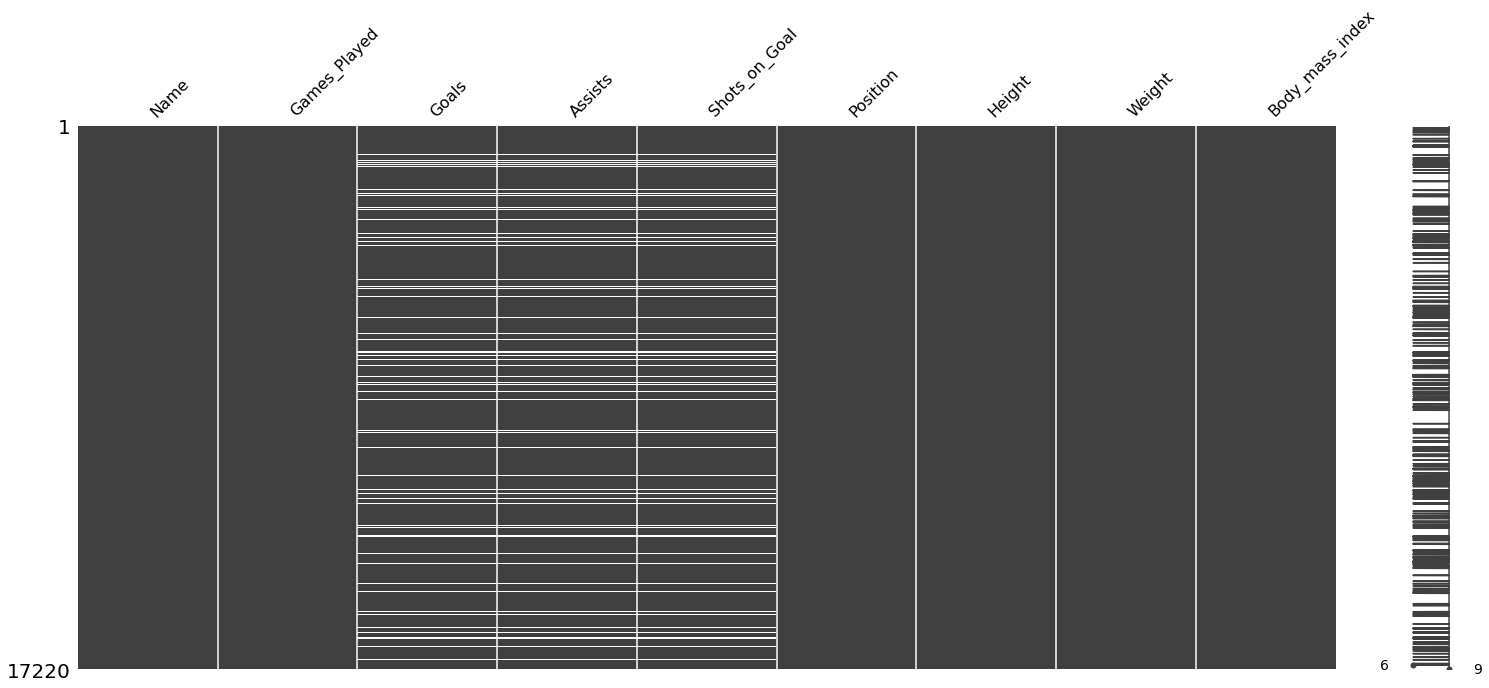

In [284]:
if mainDataCleanedColumnRowsSeason.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
    print(mainDataCleanedColumnRowsSeason[mainDataCleanedColumnRowsSeason.isnull().any(axis=1)].head(3))
    missingno.matrix(mainDataCleanedColumnRowsSeason)
    plt.show()

There are plethora of players who has NaN values on goals, assists, shots on goal becasue they are goaltenders. Therefore, I will drop these players whose statistics     are missing in order to avoid missing data.

---

In [285]:
mainDataCleanedColumnRowsMissing =  mainDataCleanedColumnRowsSeason.dropna()
mainDataCleanedColumnRowsMissing

,Name,Games_Played,Goals,Assists,Shots_on_Goal,Position,Height,Weight,Body_mass_index
0,Aaron Downey,1,0.0,0.0,0.0,Right_wing,185,98,28.6
1,Aaron Downey,3,0.0,0.0,2.0,Right_wing,185,98,28.6
2,Aaron Downey,36,1.0,0.0,10.0,Right_wing,185,98,28.6
3,Aaron Downey,43,1.0,1.0,14.0,Right_wing,185,98,28.6
4,Aaron Downey,37,1.0,1.0,11.0,Right_wing,185,98,28.6
...,...,...,...,...,...,...,...,...,...
27314,Zigmund Palffy,73,38.0,51.0,217.0,Right_wing,178,85,26.8
27315,Zigmund Palffy,63,32.0,27.0,161.0,Right_wing,178,85,26.8
27316,Zigmund Palffy,76,37.0,48.0,277.0,Right_wing,178,85,26.8
27317,Zigmund Palffy,35,16.0,25.0,109.0,Right_wing,178,85,26.8


---
Now, we see that rows dropped from 17220 to 15581 below.

---

In [286]:
mainDataCleanedColumnRowsMissing.reset_index(drop = True)

,Name,Games_Played,Goals,Assists,Shots_on_Goal,Position,Height,Weight,Body_mass_index
0,Aaron Downey,1,0.0,0.0,0.0,Right_wing,185,98,28.6
1,Aaron Downey,3,0.0,0.0,2.0,Right_wing,185,98,28.6
2,Aaron Downey,36,1.0,0.0,10.0,Right_wing,185,98,28.6
3,Aaron Downey,43,1.0,1.0,14.0,Right_wing,185,98,28.6
4,Aaron Downey,37,1.0,1.0,11.0,Right_wing,185,98,28.6
...,...,...,...,...,...,...,...,...,...
15576,Zigmund Palffy,73,38.0,51.0,217.0,Right_wing,178,85,26.8
15577,Zigmund Palffy,63,32.0,27.0,161.0,Right_wing,178,85,26.8
15578,Zigmund Palffy,76,37.0,48.0,277.0,Right_wing,178,85,26.8
15579,Zigmund Palffy,35,16.0,25.0,109.0,Right_wing,178,85,26.8


There are number of players which are duplicates and needed to be added together in order to have total number of goals, games played, assits, shots on goal.

In [287]:
allTogether = mainDataCleanedColumnRowsMissing.groupby(['Name', 'Position', 'Height', 'Weight', 'Body_mass_index'], as_index = False)[["Games_Played","Goals", "Assists", "Shots_on_Goal"]].sum()
allTogether = allTogether[allTogether.Position != 'Forward'] # There are a little number of players who play in the forward position. 
# I decided to drop them, in order to be concise. 
allTogether = allTogether.reset_index(drop = True)
allTogether

,Name,Position,Height,Weight,Body_mass_index,Games_Played,Goals,Assists,Shots_on_Goal
0,Aaron Downey,Right_wing,185,98,28.6,243,8.0,10.0,85.0
1,Aaron Gagnon,Centre,180,85,26.2,38,3.0,2.0,28.0
2,Aaron Gavey,Centre,188,86,24.3,197,23.0,32.0,224.0
3,Aaron MacKenzie,Defence,183,88,26.3,5,0.0,0.0,3.0
4,Aaron Miller,Defence,190,94,26.0,475,13.0,64.0,353.0
...,...,...,...,...,...,...,...,...,...
2417,Zdeno Chara,Defence,206,113,26.6,1469,203.0,444.0,3205.0
2418,Zdeno Ciger,Left_wing,185,91,26.6,56,12.0,13.0,92.0
2419,Zenith Komarniski,Defence,183,91,27.2,21,1.0,1.0,22.0
2420,Zenon Konopka,Centre,183,97,29.0,346,12.0,18.0,200.0


Above, we find the dataset with grouping of names, positions, heights, weights, BMIs of the players.   
There were players who played since 2000, however 
in different years, therefore, I grouped them with the total number of games played, goals, assists, shots on goal.   
Number of rows decreased from **15581** to **2422**.

---

We have the cleaned and restructured dataset needed above. Now, we need to analyze relationships between variables.   
Below, we can see the **Correlation Matrix** which helps us to visualize correlation between all variables.

---

In [307]:
allTogether.Height.mean()

185.60156895127994

<AxesSubplot:>

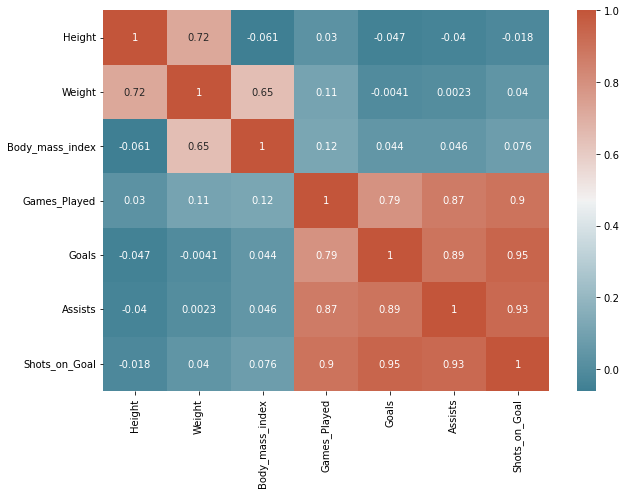

In [288]:
corr = allTogether.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

---
#### Above, we can see there are **strong positive correlations** between these variables below:
##### - Goals vs. games played
##### - Assists vs. games played
##### - Shots on goal vs. games played
#### Now, I will use three **scatter plots** to visualize the correlation between them. 
---

<AxesSubplot:xlabel='Games_Played', ylabel='Shots_on_Goal'>

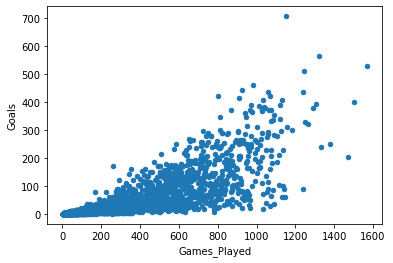

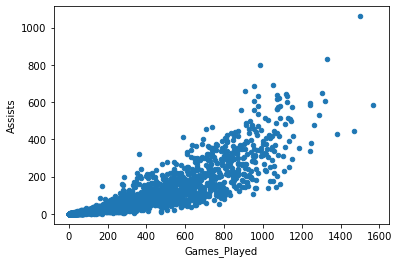

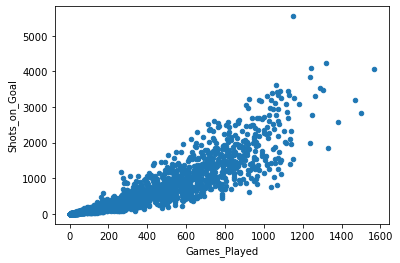

In [293]:
allTogether.plot(kind='scatter', x='Games_Played', y='Goals')
allTogether.plot(kind='scatter', x='Games_Played', y='Assists')
allTogether.plot(kind='scatter', x='Games_Played', y='Shots_on_Goal')

---

Above, we can see **positive correlations** on all the three scatter plots. In each, the games played has an increasing effect on goals, assists, and shots on goal.  
Of course, it was expected. From other perspective, we can also see that there are players who have more games played had less goals, less assists, and less shots   
on goal than the players who played less games, and vice versa.  

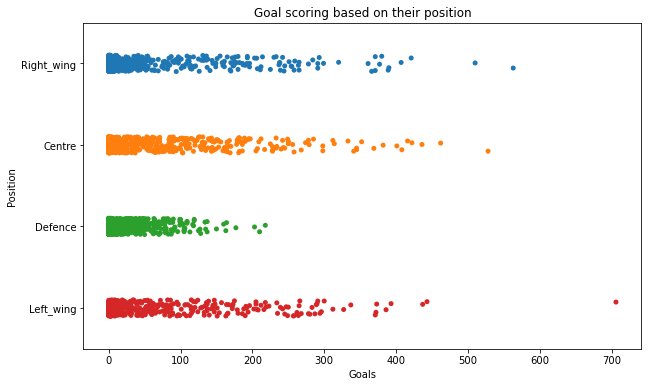

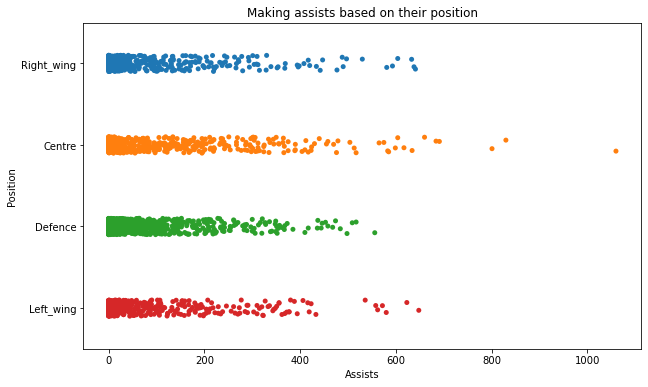

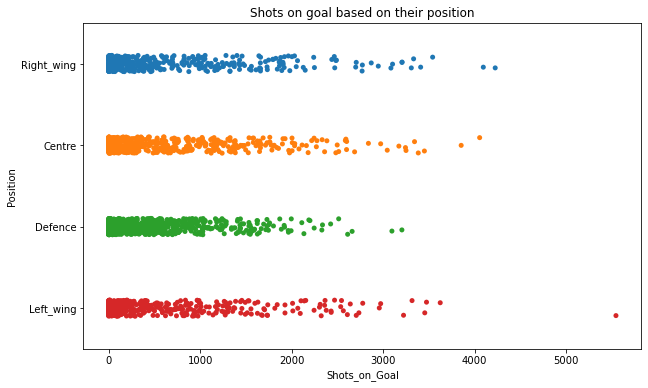

In [314]:
plt.figure(figsize = (10,6))    
sns.stripplot(data = allTogether , x = 'Goals',y = 'Position')
plt.title('Goal scoring based on their position')
plt.show()
plt.figure(figsize = (10,6))
sns.stripplot(data = allTogether , x = 'Assists',y = 'Position')
plt.title('Making assists based on their position')
plt.show()
plt.figure(figsize = (10,6))
sns.stripplot(data = allTogether , x = 'Shots_on_Goal',y = 'Position')
plt.title('Shots on goal based on their position')
plt.show()

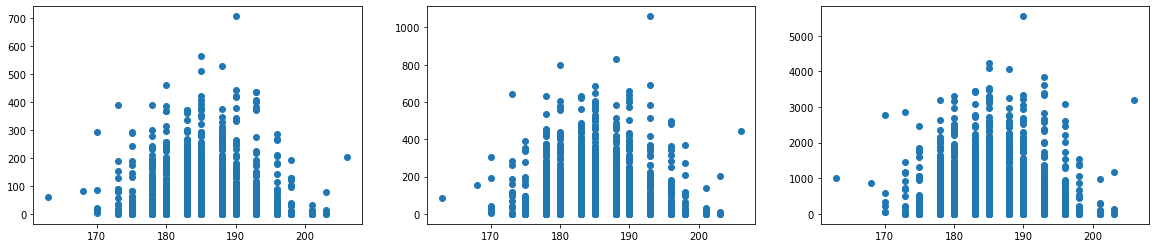

In [361]:
figure, axis = plt.subplots(1, 3, figsize = (20, 4))
X = allTogether.Height
Y1 = allTogether.Goals
Y2 = allTogether.Assists
Y3 = allTogether.Shots_on_Goal
axis[0].scatter(X, Y1)
axis[1].scatter(X, Y2)
axis[2].scatter(X, Y3)

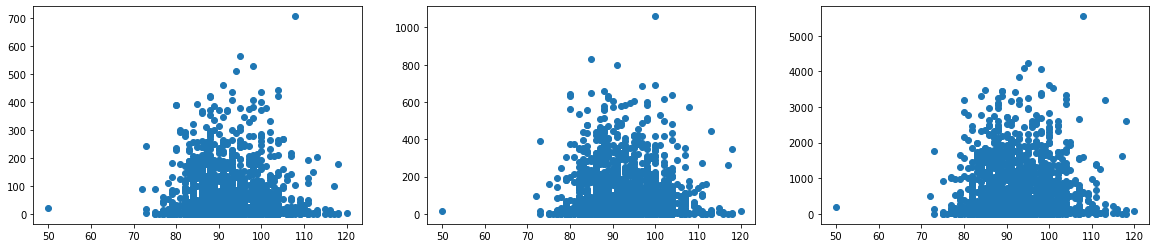

In [362]:
figure, axis = plt.subplots(1, 3, figsize = (20, 4))
X = allTogether.Weight
Y1 = allTogether.Goals
Y2 = allTogether.Assists
Y3 = allTogether.Shots_on_Goal
axis[0].scatter(X, Y1)
axis[1].scatter(X, Y2)
axis[2].scatter(X, Y3)

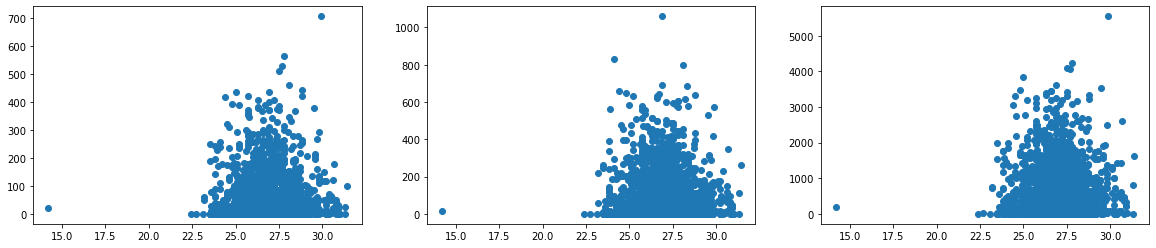

In [365]:
figure, axis = plt.subplots(1, 3, figsize = (20, 4))
X = allTogether.Body_mass_index
Y1 = allTogether.Goals
Y2 = allTogether.Assists
Y3 = allTogether.Shots_on_Goal
axis[0].scatter(X, Y1)
axis[1].scatter(X, Y2)
axis[2].scatter(X, Y3)